References <br /> 
https://github.com/iSchool-590pr/PR_Sp20_examples/blob/master/week_07/class7_pandas_pt2.ipynb <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html <br /> 
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html <br /> 
https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html <br /> 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html <br />
https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index<br />
https://stackoverflow.com/questions/49350445/correlation-coefficient-of-two-columns-in-pandas-dataframe-with-corr<br/> 
https://pandas.pydata.org/pandas-docs/version/0.16.0/visualization.html<br />
https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/<br/>   

<br /> 
Data Sources<br /> 
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i<br /> 
https://catalog.data.gov/dataset/nypd-arrests-data-historic<br /> 
https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Neighborhood-Tabulatio/swpk-hqdp<br /> 
https://data.cityofnewyork.us/Public-Safety/EMS-Incident-Dispatch-Data/76xm-jjuj<br /> 
https://worldpopulationreview.com/us-cities/new-york-city-population/ <br/>
https://en.wikipedia.org/wiki/Demographics_of_New_York_City<br/> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hypothesis 1: 
The number of crimes decreased in neighborhoods where the previous number of arrests is high indicating that maybe the police 
force is handling the situations better.

In [2]:
my_dir = 'C:/Users/rahul/Downloads/UIUC/Sem 2 - Spring 2020/Courses/Programing Analytics/Final Project/DataSets/' #https://github.com/iSchool-590pr/PR_Sp20_examples/blob/master/week_07/class7_pandas_pt2.ipynb
NYPD_Arrests = my_dir + 'NYPD_Arrests_Data__Historic_.csv' # Loading NYPD Arrest Data file
Complaints = my_dir +  'NYPD_Complaint_Data_Historic.csv' # Loading NYPD Complaints Data file
EMS_incident = my_dir +  'EMS_Incident_Dispatch_Data.csv' # Loading EMS incident dispatch Data file
NYC_Population = my_dir +  'New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv' # Loading NYC Population Data file

In [3]:
def get_file(csv_files):
    
    """Given a filename which has a comma separated (.csv) filetype,return a pandas  
    dataframe of crime data containing the three relevant columns needed for analysis.
    
    We load the file as a pandas dataframe having no headers and load only 3 relevant column 
    needed for analysis called (CMPLNT_NUM,CMPLNT_FR_DT and BORO_NM)
    
    :param csv_files: The csv file to load
    :return: a pandas dataframe of crime data containing the three relevant columns needed for analysis
    """
    data_file = pd.read_csv(csv_files,usecols=['CMPLNT_NUM','CMPLNT_FR_DT','BORO_NM']) # Import only necessary columns from the dataset
    return data_file

In [4]:
NYC_Complaint_Data = get_file(Complaints) 
NYC_Complaint_Data #106 seconds to run, 33 seconds with relevant columns

,CMPLNT_NUM,CMPLNT_FR_DT,BORO_NM
0,876525802,04/10/2008,BROOKLYN
1,402693528,06/03/2007,MANHATTAN
2,832030069,02/16/2010,QUEENS
3,538308771,11/10/2009,BROOKLYN
4,965693192,04/11/2006,STATEN ISLAND
5,141085517,06/23/2011,BROOKLYN
6,484433797,11/24/2007,BRONX
7,106486628,03/29/2008,BROOKLYN
8,859668043,04/21/2006,MANHATTAN
9,499632944,04/14/2006,STATEN ISLAND


In [5]:
NYC_Complaint_Data['Complaint_Filed_Month'] = NYC_Complaint_Data.CMPLNT_FR_DT.str[:2]
NYC_Complaint_Data['Complaint_Filed_Year'] = NYC_Complaint_Data.CMPLNT_FR_DT.str[-4:]
NYC_Complaint_Data

,CMPLNT_NUM,CMPLNT_FR_DT,BORO_NM,Complaint_Filed_Month,Complaint_Filed_Year
0,876525802,04/10/2008,BROOKLYN,04,2008
1,402693528,06/03/2007,MANHATTAN,06,2007
2,832030069,02/16/2010,QUEENS,02,2010
3,538308771,11/10/2009,BROOKLYN,11,2009
4,965693192,04/11/2006,STATEN ISLAND,04,2006
5,141085517,06/23/2011,BROOKLYN,06,2011
6,484433797,11/24/2007,BRONX,11,2007
7,106486628,03/29/2008,BROOKLYN,03,2008
8,859668043,04/21/2006,MANHATTAN,04,2006
9,499632944,04/14/2006,STATEN ISLAND,04,2006


In [6]:
NYC_Complaint_Data = NYC_Complaint_Data.dropna(subset=['Complaint_Filed_Year'])
NYC_Complaint_Data = NYC_Complaint_Data.astype({'Complaint_Filed_Year': 'int64'})
NYC_Complaint_Data = NYC_Complaint_Data[NYC_Complaint_Data['Complaint_Filed_Year'] > 2005]
NYC_Complaint_Data

,CMPLNT_NUM,CMPLNT_FR_DT,BORO_NM,Complaint_Filed_Month,Complaint_Filed_Year
0,876525802,04/10/2008,BROOKLYN,04,2008
1,402693528,06/03/2007,MANHATTAN,06,2007
2,832030069,02/16/2010,QUEENS,02,2010
3,538308771,11/10/2009,BROOKLYN,11,2009
4,965693192,04/11/2006,STATEN ISLAND,04,2006
5,141085517,06/23/2011,BROOKLYN,06,2011
6,484433797,11/24/2007,BRONX,11,2007
7,106486628,03/29/2008,BROOKLYN,03,2008
8,859668043,04/21/2006,MANHATTAN,04,2006
9,499632944,04/14/2006,STATEN ISLAND,04,2006


In [7]:
Crime_count = NYC_Complaint_Data.groupby(['BORO_NM','Complaint_Filed_Year','Complaint_Filed_Month']).agg({'CMPLNT_NUM': ['count']}) #https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
Crime_count

CMPLNT_NUM
                                                              count
BORO_NM       Complaint_Filed_Year Complaint_Filed_Month           
BRONX         2006                 01                          9363
                                   02                          7758
                                   03                          9425
                                   04                          8756
                                   05                          9454
                                   06                          9239
                                   07                          9867
                                   08                          9825
                                   09                          9740
                                   10                          9927
                                   11                          8887
                                   12                          8877
              2007                 01                          9846
                                   02                          8139
                                   03                          9404
                                   04                          9388
                                   05                         10685
                                   06                          9954
                                   07                         10366
                                   08                         10259
                                   09                         10438
                                   10                         10330
                                   11                          9235
                                   12                          8839
              2008                 01                         10325
                                   02                          8767
                                   03                          9739
                                   04                          9619
                                   05                          9903
                                   06                         10013
...                                                             ...
STATEN ISLAND 2017                 04                          1722
                                   05                          1909
                                   06                          1908
                                   07                          1937
                                   08                          1884
                                   09                          1819
                                   10                          1889
                                   11                          1631
                                   12                          1643
              2018                 01                          1644
                                   02                          1513
                                   03                          1621
                                   04                          1749
                                   05                          1891
                                   06                          1813
                                   07                          1913
                                   08                          1829
                                   09                          1703
                                   10                          1772
                                   11                          1638
                                   12                          1645
              2019                 01                          1503
                                   02                          1349
                                   03                          1474
                                   04                          1495
                                   05        

In [8]:
def get_file_arrestdata(csv_files):
    
    """Given a filename which has a comma separated (.csv) filetype,return a pandas  
    dataframe of arrest data containing the three relevant columns needed for analysis.
    
    We load the file as a pandas dataframe having no headers and load only 3 relevant column 
    needed for analysis called (ARREST_KEY,ARREST_DATE and ARREST_BORO)
    
    :param csv_files: The csv file to load
    :return: a pandas dataframe of arrest data containing the three relevant columns needed for analysis
    """
    data_file = pd.read_csv(csv_files,usecols=['ARREST_KEY','ARREST_DATE','ARREST_BORO']) # Import only necessary columns from the dataset
    return data_file

In [9]:
NYC_Arrest_Data = get_file_arrestdata(NYPD_Arrests) 
NYC_Arrest_Data #26 seconds to run
#NYC_Complaint_Data = get_file(Complaints) 
#NYC_Complaint_Data #106 seconds to run
#EMS_Dispatch_Data = get_file(EMS_incident) 
#EMS_Dispatch_Data #12.5 minutes to run

,ARREST_KEY,ARREST_DATE,ARREST_BORO
0,173130602,12/31/2017,Q
1,173114463,12/31/2017,Q
2,173113513,12/31/2017,K
3,173113423,12/31/2017,M
4,173113421,12/31/2017,M
5,173130583,12/31/2017,K
6,173129349,12/31/2017,M
7,173128438,12/31/2017,M
8,173128437,12/31/2017,M
9,173128433,12/31/2017,M


In [10]:
NYC_Arrest_Data.ARREST_BORO.unique()

array(['Q', 'K', 'M', 'S', 'B', nan], dtype=object)

In [11]:
#replacing Borough initials with complete names
NYC_Arrest_Data = NYC_Arrest_Data.replace({'ARREST_BORO': 'K'}, 'BROOKLYN')
NYC_Arrest_Data = NYC_Arrest_Data.replace({'ARREST_BORO': 'M'}, 'MANHATTAN')
NYC_Arrest_Data = NYC_Arrest_Data.replace({'ARREST_BORO': 'S'}, 'STATEN ISLAND')
NYC_Arrest_Data = NYC_Arrest_Data.replace({'ARREST_BORO': 'B'}, 'BRONX')
NYC_Arrest_Data = NYC_Arrest_Data.replace({'ARREST_BORO': 'Q'}, 'QUEENS')
NYC_Arrest_Data

,ARREST_KEY,ARREST_DATE,ARREST_BORO
0,173130602,12/31/2017,QUEENS
1,173114463,12/31/2017,QUEENS
2,173113513,12/31/2017,BROOKLYN
3,173113423,12/31/2017,MANHATTAN
4,173113421,12/31/2017,MANHATTAN
5,173130583,12/31/2017,BROOKLYN
6,173129349,12/31/2017,MANHATTAN
7,173128438,12/31/2017,MANHATTAN
8,173128437,12/31/2017,MANHATTAN
9,173128433,12/31/2017,MANHATTAN


In [12]:
NYC_Arrest_Data['Arrest_Month'] = NYC_Arrest_Data.ARREST_DATE.str[:2]
NYC_Arrest_Data['Arrest_Year'] = NYC_Arrest_Data.ARREST_DATE.str[-4:]
NYC_Arrest_Data

,ARREST_KEY,ARREST_DATE,ARREST_BORO,Arrest_Month,Arrest_Year
0,173130602,12/31/2017,QUEENS,12,2017
1,173114463,12/31/2017,QUEENS,12,2017
2,173113513,12/31/2017,BROOKLYN,12,2017
3,173113423,12/31/2017,MANHATTAN,12,2017
4,173113421,12/31/2017,MANHATTAN,12,2017
5,173130583,12/31/2017,BROOKLYN,12,2017
6,173129349,12/31/2017,MANHATTAN,12,2017
7,173128438,12/31/2017,MANHATTAN,12,2017
8,173128437,12/31/2017,MANHATTAN,12,2017
9,173128433,12/31/2017,MANHATTAN,12,2017


In [13]:
NYC_Arrest_Data = NYC_Arrest_Data.dropna(subset=['Arrest_Year'])
NYC_Arrest_Data = NYC_Arrest_Data.astype({'Arrest_Year': 'int64'})
NYC_Arrest_Data = NYC_Arrest_Data[NYC_Arrest_Data['Arrest_Year'] > 2005]
#NYC_Arrest_Data["Arrest_Month/Year"] = NYC_Arrest_Data["Arrest_Month"] +"/"+ NYC_Arrest_Data["Arrest_Year"]
NYC_Arrest_Data.dtypes

ARREST_KEY       int64
ARREST_DATE     object
ARREST_BORO     object
Arrest_Month    object
Arrest_Year      int64
dtype: object

In [14]:
Arrest_count = NYC_Arrest_Data.groupby(['ARREST_BORO','Arrest_Year','Arrest_Month']).agg({'ARREST_KEY': ['count']}) #https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
Arrest_count

ARREST_KEY
                                            count
ARREST_BORO   Arrest_Year Arrest_Month           
BRONX         2006        01                 7338
                          02                 6600
                          03                 7854
                          04                 6720
                          05                 7176
                          06                 6562
                          07                 6839
                          08                 7292
                          09                 6881
                          10                 7348
                          11                 6700
                          12                 6585
              2007        01                 9386
                          02                 7945
                          03                 8398
                          04                 7894
                          05                 8587
                          06                 7660
                          07                 7779
                          08                 8277
                          09                 7591
                          10                 8125
                          11                 7529
                          12                 6546
              2008        01                 9217
                          02                 8327
                          03                 8912
                          04                 8215
                          05                 8405
                          06                 7822
...                                           ...
STATEN ISLAND 2016        07                  987
                          08                 1095
                          09                 1124
                          10                 1065
                          11                  925
                          12                  933
              2017        01                  972
                          02                  897
                          03                  964
                          04                 1011
                          05                 1030
                          06                  993
                          07                 1032
                          08                 1003
                          09                  895
                          10                  949
                          11                  855
                          12                  777
              2018        01                  946
                          02                  841
                          03                  863
                          04                  921
                          05                  952
                          06                  828
                          07                  894
                          08                  927
                          09                  776
                          10                  936
                          11                  798
                          12                  742

[780 rows x 1 columns]

In [15]:
result = pd.concat([Crime_count, Arrest_count], axis=1, join='inner')
result=result.sort_index(axis = 0) 
#result = result.reset_index()
result

CMPLNT_NUM ARREST_KEY
                           count      count
BRONX         2006 01       9363       7338
                   02       7758       6600
                   03       9425       7854
                   04       8756       6720
                   05       9454       7176
                   06       9239       6562
                   07       9867       6839
                   08       9825       7292
                   09       9740       6881
                   10       9927       7348
                   11       8887       6700
                   12       8877       6585
              2007 01       9846       9386
                   02       8139       7945
                   03       9404       8398
                   04       9388       7894
                   05      10685       8587
                   06       9954       7660
                   07      10366       7779
                   08      10259       8277
                   09      10438       7591
                   10      10330       8125
                   11       9235       7529
                   12       8839       6546
              2008 01      10325       9217
                   02       8767       8327
                   03       9739       8912
                   04       9619       8215
                   05       9903       8405
                   06      10013       7822
...                          ...        ...
STATEN ISLAND 2016 07       1907        987
                   08       1865       1095
                   09       1844       1124
                   10       1933       1065
                   11       1759        925
                   12       1677        933
              2017 01       1783        972
                   02       1457        897
                   03       1697        964
                   04       1722       1011
                   05       1909       1030
                   06       1908        993
                   07       1937       1032
                   08       1884       1003
                   09       1819        895
                   10       1889        949
                   11       1631        855
                   12       1643        777
              2018 01       1644        946
                   02       1513        841
                   03       1621        863
                   04       1749        921
                   05       1891        952
                   06       1813        828
                   07       1913        894
                   08       1829        927
                   09       1703        776
                   10       1772        936
                   11       1638        798
                   12       1645        742

[780 rows x 2 columns]

Text(0.5, 1.0, 'STATEN ISLAND - Crime and Arrest count from 2006-2017')

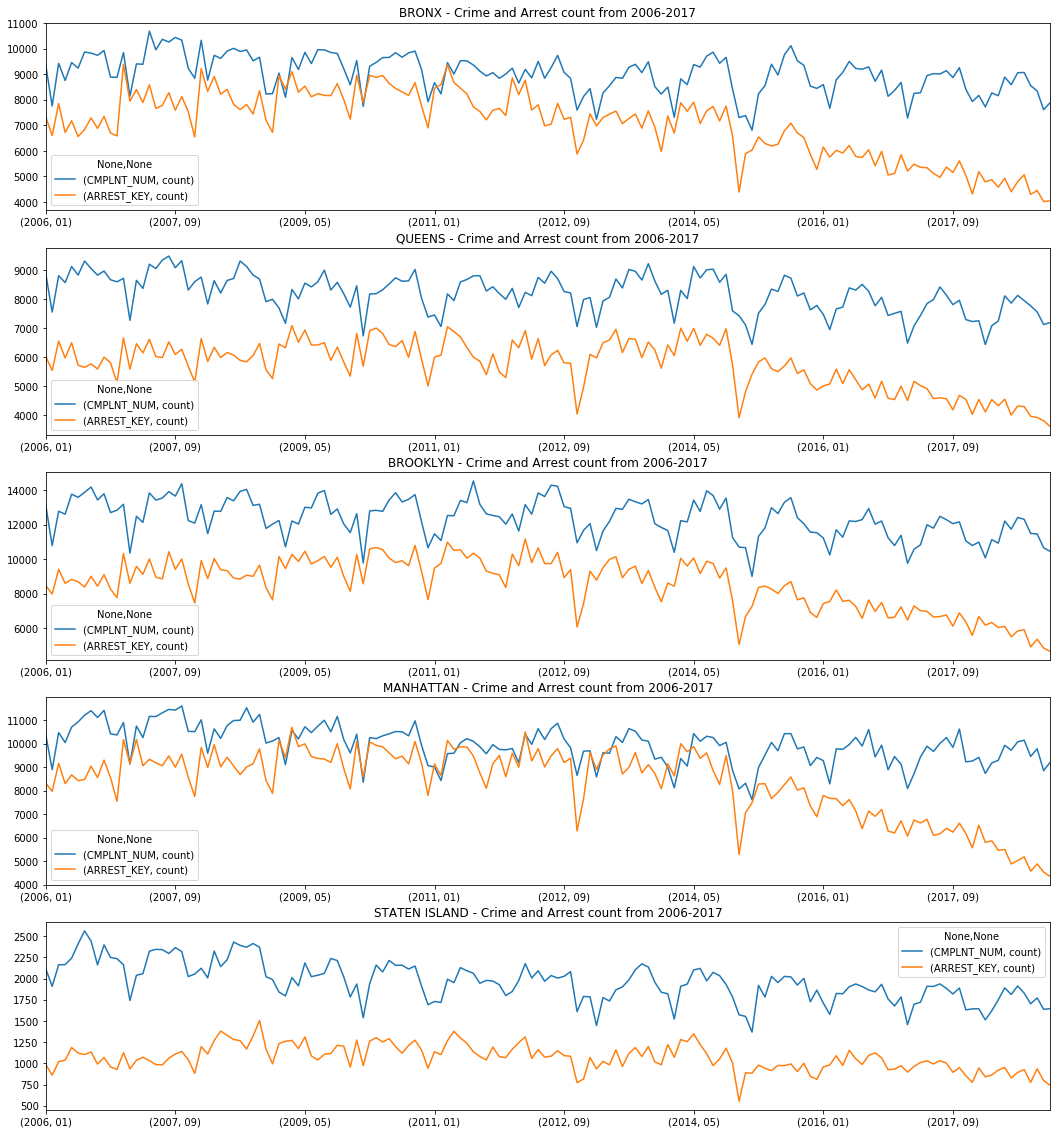

In [16]:
figure, axis = plt.subplots(5,1,figsize=(18,20)) #https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index
result.xs('BRONX').plot(kind='line',ax=axis[0]).set_title('BRONX - Crime and Arrest count from 2006-2017') #https://pandas.pydata.org/pandas-docs/version/0.16.0/visualization.html
result.xs('QUEENS').plot(kind='line',ax=axis[1]).set_title('QUEENS - Crime and Arrest count from 2006-2017') 
result.xs('BROOKLYN').plot(kind='line',ax=axis[2]).set_title('BROOKLYN - Crime and Arrest count from 2006-2017') 
result.xs('MANHATTAN').plot(kind='line',ax=axis[3]).set_title('MANHATTAN - Crime and Arrest count from 2006-2017') 
result.xs('STATEN ISLAND').plot(kind='line',ax=axis[4]).set_title('STATEN ISLAND - Crime and Arrest count from 2006-2017') 

# HYPOTHESIS 2:
There exist certain types of crimes where there is prejudice agianst the victims of a particular race

In [17]:
def get_complaint_file(csv_files):
    
    """Given a filename which has a comma separated (.csv) filetype,return a pandas  
    dataframe of crime data containing the four relevant columns needed for analysis.
    
    We load the file as a pandas dataframe having no headers and load only 4 relevant column 
    needed for analysis called (CMPLNT_NUM,VIC_RACE,OFNS_DESC and BORO_NM)
    
    :param csv_files: The csv file to load
    :return: a pandas dataframe of crime data containing the three relevant columns needed for analysis
    """
    data_file = pd.read_csv(csv_files,usecols=['CMPLNT_NUM','BORO_NM','VIC_RACE','OFNS_DESC']) # Import only necessary columns from the dataset
    return data_file

In [18]:
NYC_Complaints_df = get_complaint_file(Complaints) 
NYC_Complaints_df #106 seconds to run, 33 seconds with relevant columns


,CMPLNT_NUM,OFNS_DESC,BORO_NM,VIC_RACE
0,876525802,PETIT LARCENY,BROOKLYN,BLACK
1,402693528,DANGEROUS WEAPONS,MANHATTAN,UNKNOWN
2,832030069,ROBBERY,QUEENS,UNKNOWN
3,538308771,PETIT LARCENY,BROOKLYN,UNKNOWN
4,965693192,THEFT-FRAUD,STATEN ISLAND,WHITE
5,141085517,DANGEROUS WEAPONS,BROOKLYN,UNKNOWN
6,484433797,POSSESSION OF STOLEN PROPERTY,BRONX,UNKNOWN
7,106486628,DANGEROUS DRUGS,BROOKLYN,UNKNOWN
8,859668043,ROBBERY,MANHATTAN,WHITE HISPANIC
9,499632944,VEHICLE AND TRAFFIC LAWS,STATEN ISLAND,UNKNOWN


In [19]:
NYC_Complaints_df.VIC_RACE.unique() # get unique values of the races in the dataframe

array(['BLACK', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC', 'BLACK HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE', nan,
       'OTHER'], dtype=object)

In [20]:
NYC_Complaints_df.VIC_RACE = NYC_Complaints_df.VIC_RACE.fillna('UNKNOWN') #replacing nans with 'UNKNOWN'
NYC_Complaints_df.VIC_RACE.unique()
NYC_Complaints_df = NYC_Complaints_df.replace({'VIC_RACE': 'UNKNOWN'}, 'UNKNOWN/OTHER')
NYC_Complaints_df = NYC_Complaints_df.replace({'VIC_RACE': 'OTHER'}, 'UNKNOWN/OTHER')

In [21]:
#Selecting only a particular set of crimes that involve harming another human
type_of_crime = ['HARRASSMENT 2','BURGLARY','ROBBERY','FELONY ASSAULT','SEX CRIMES','OFFENSES INVOLVING FRAUD','RAPE','THEFT-FRAUD','MURDER & NON-NEGL. MANSLAUGHTER','KIDNAPPING & RELATED OFFENSES','OFFENSES RELATED TO CHILDREN','KIDNAPPING','OTHER OFFENSES RELATED TO THEF','PETIT LARCENY','GRAND LARCENY','FORGERY','FRAUDS','ASSAULT 3 & RELATED OFFENSES']
#https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/
NYC_Complaints_df =NYC_Complaints_df[NYC_Complaints_df.OFNS_DESC.isin(type_of_crime)]
NYC_Complaints_df
#complaints_df_new.OFNS_DESC.unique()

,CMPLNT_NUM,OFNS_DESC,BORO_NM,VIC_RACE
0,876525802,PETIT LARCENY,BROOKLYN,BLACK
2,832030069,ROBBERY,QUEENS,UNKNOWN/OTHER
3,538308771,PETIT LARCENY,BROOKLYN,UNKNOWN/OTHER
4,965693192,THEFT-FRAUD,STATEN ISLAND,WHITE
8,859668043,ROBBERY,MANHATTAN,WHITE HISPANIC
10,330148303,FELONY ASSAULT,BRONX,BLACK
11,772315573,GRAND LARCENY,QUEENS,BLACK
14,218747981,THEFT-FRAUD,BROOKLYN,WHITE HISPANIC
16,774511569,FORGERY,MANHATTAN,UNKNOWN/OTHER
17,458693223,PETIT LARCENY,BRONX,WHITE


In [22]:
#race_count = complaints_df_new.groupby(['OFNS_DESC','VIC_RACE']).agg({'CMPLNT_NUM': ['count']}).reset_index()
NYC_Complaints_df = NYC_Complaints_df.groupby(["OFNS_DESC", "VIC_RACE"], as_index=False).count()
NYC_Complaints_df = NYC_Complaints_df[['OFNS_DESC','VIC_RACE','CMPLNT_NUM']]
NYC_Complaints_df

,OFNS_DESC,VIC_RACE,CMPLNT_NUM
0,ASSAULT 3 & RELATED OFFENSES,AMERICAN INDIAN/ALASKAN NATIVE,3724
1,ASSAULT 3 & RELATED OFFENSES,ASIAN / PACIFIC ISLANDER,46057
2,ASSAULT 3 & RELATED OFFENSES,BLACK,277634
3,ASSAULT 3 & RELATED OFFENSES,BLACK HISPANIC,41888
4,ASSAULT 3 & RELATED OFFENSES,UNKNOWN/OTHER,49764
5,ASSAULT 3 & RELATED OFFENSES,WHITE,98708
6,ASSAULT 3 & RELATED OFFENSES,WHITE HISPANIC,200300
7,BURGLARY,AMERICAN INDIAN/ALASKAN NATIVE,1379
8,BURGLARY,ASIAN / PACIFIC ISLANDER,20494
9,BURGLARY,BLACK,41857


In [23]:
#https://worldpopulationreview.com/us-cities/new-york-city-population/
#total NYC population = 8175133
# AMERICAN INDIAN/ALASKAN NATIVE  0.43    `   
# ASIAN / PACIFIC ISLANDER  13.95 + 0.05       
# BLACK            21.95                
# BLACK HISPANIC      2.33               
# UNKNOWN/OTHER     18.62                
# WHITE           32.14                  
# WHITE HISPANIC     10.53    
#Creating a function to add crime per capita values
def race_percentage(row):  #https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
   if row['VIC_RACE'] == 'AMERICAN INDIAN/ALASKAN NATIVE' :
      return 0.0043
   if row['VIC_RACE'] == 'ASIAN / PACIFIC ISLANDER':
      return 0.14
   if row['VIC_RACE'] == 'BLACK' :
      return 0.2195
   if row['VIC_RACE'] == 'BLACK HISPANIC':
      return 0.0233
   if row['VIC_RACE'] == 'WHITE':
      return 0.3214
   if row['VIC_RACE'] == 'WHITE HISPANIC':
      return 0.1053
   if row['VIC_RACE']  == 'UNKNOWN/OTHER':
      return 0.1862

In [24]:
NYC_Complaints_df.apply (lambda row: race_percentage(row), axis=1) #https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
NYC_Complaints_df['race_percentage'] = NYC_Complaints_df.apply (lambda row: race_percentage(row), axis=1)
#race_count_new['race_population'] = race_count_new['race_percentage']*8175133
#race_count_new['race_population'] = race_count_new['race_population'].astype('int64')
NYC_Complaints_df

,OFNS_DESC,VIC_RACE,CMPLNT_NUM,race_percentage
0,ASSAULT 3 & RELATED OFFENSES,AMERICAN INDIAN/ALASKAN NATIVE,3724,0.0043
1,ASSAULT 3 & RELATED OFFENSES,ASIAN / PACIFIC ISLANDER,46057,0.1400
2,ASSAULT 3 & RELATED OFFENSES,BLACK,277634,0.2195
3,ASSAULT 3 & RELATED OFFENSES,BLACK HISPANIC,41888,0.0233
4,ASSAULT 3 & RELATED OFFENSES,UNKNOWN/OTHER,49764,0.1862
5,ASSAULT 3 & RELATED OFFENSES,WHITE,98708,0.3214
6,ASSAULT 3 & RELATED OFFENSES,WHITE HISPANIC,200300,0.1053
7,BURGLARY,AMERICAN INDIAN/ALASKAN NATIVE,1379,0.0043
8,BURGLARY,ASIAN / PACIFIC ISLANDER,20494,0.1400
9,BURGLARY,BLACK,41857,0.2195


In [25]:
NYC_Complaints_df['Normalized results'] = NYC_Complaints_df['CMPLNT_NUM']/NYC_Complaints_df['race_percentage']
NYC_Complaints_df['Normalized results'] = NYC_Complaints_df['Normalized results'].astype('int64')
NYC_Complaints_df

,OFNS_DESC,VIC_RACE,CMPLNT_NUM,race_percentage,Normalized results
0,ASSAULT 3 & RELATED OFFENSES,AMERICAN INDIAN/ALASKAN NATIVE,3724,0.0043,866046
1,ASSAULT 3 & RELATED OFFENSES,ASIAN / PACIFIC ISLANDER,46057,0.1400,328978
2,ASSAULT 3 & RELATED OFFENSES,BLACK,277634,0.2195,1264847
3,ASSAULT 3 & RELATED OFFENSES,BLACK HISPANIC,41888,0.0233,1797768
4,ASSAULT 3 & RELATED OFFENSES,UNKNOWN/OTHER,49764,0.1862,267261
5,ASSAULT 3 & RELATED OFFENSES,WHITE,98708,0.3214,307118
6,ASSAULT 3 & RELATED OFFENSES,WHITE HISPANIC,200300,0.1053,1902184
7,BURGLARY,AMERICAN INDIAN/ALASKAN NATIVE,1379,0.0043,320697
8,BURGLARY,ASIAN / PACIFIC ISLANDER,20494,0.1400,146385
9,BURGLARY,BLACK,41857,0.2195,190692


In [26]:
NYC_Complaints_df1 = NYC_Complaints_df.groupby(['OFNS_DESC','VIC_RACE']).agg({'Normalized results': ['sum']})
NYC_Complaints_df1

Normalized results
                                                                           sum
OFNS_DESC                    VIC_RACE                                         
ASSAULT 3 & RELATED OFFENSES AMERICAN INDIAN/ALASKAN NATIVE             866046
                             ASIAN / PACIFIC ISLANDER                   328978
                             BLACK                                     1264847
                             BLACK HISPANIC                            1797768
                             UNKNOWN/OTHER                              267261
                             WHITE                                      307118
                             WHITE HISPANIC                            1902184
BURGLARY                     AMERICAN INDIAN/ALASKAN NATIVE             320697
                             ASIAN / PACIFIC ISLANDER                   146385
                             BLACK                                      190692
                             BLACK HISPANIC                             245021
                             UNKNOWN/OTHER                              424022
                             WHITE                                      173976
                             WHITE HISPANIC                             299249
FELONY ASSAULT               AMERICAN INDIAN/ALASKAN NATIVE             227209
                             ASIAN / PACIFIC ISLANDER                    99064
                             BLACK                                      489708
                             BLACK HISPANIC                             651459
                             UNKNOWN/OTHER                              166874
                             WHITE                                       90258
                             WHITE HISPANIC                             597122
FORGERY                      AMERICAN INDIAN/ALASKAN NATIVE              18837
                             ASIAN / PACIFIC ISLANDER                     4600
                             BLACK                                        9161
                             BLACK HISPANIC                              18326
                             UNKNOWN/OTHER                              335225
                             WHITE                                        7433
                             WHITE HISPANIC                              15574
FRAUDS                       AMERICAN INDIAN/ALASKAN NATIVE              27674
                             ASIAN / PACIFIC ISLANDER                    14028
...                                                                        ...
PETIT LARCENY                WHITE                                      714175
                             WHITE HISPANIC                            1198822
RAPE                         AMERICAN INDIAN/ALASKAN NATIVE              12325
                             ASIAN / PACIFIC ISLANDER                     7842
                             BLACK                                       32451
                             BLACK HISPANIC                              54763
                             UNKNOWN/OTHER                                6181
                             WHITE                                        9492
                             WHITE HISPANIC                              57853
ROBBERY                      AMERICAN INDIAN/ALASKAN NATIVE             408372
                             ASIAN / PACIFIC ISLANDER                   194092
                             BLACK                                      311507
                             BLACK HISPANIC                             591630
                             UNKNOWN/OTHER                              188743
                             WHITE                                      113014
                             WHITE HISPANIC                             636248
SEX CRIMES                   AMERICAN INDIAN/ALASKAN NATIVE              52325
                             AS

In [27]:
NYC_Complaints_df_plot = NYC_Complaints_df.groupby(['VIC_RACE','OFNS_DESC']).agg({'Normalized results': ['sum']})
NYC_Complaints_df_plot

Normalized results
                                                                              sum
VIC_RACE                       OFNS_DESC                                         
AMERICAN INDIAN/ALASKAN NATIVE ASSAULT 3 & RELATED OFFENSES                866046
                               BURGLARY                                    320697
                               FELONY ASSAULT                              227209
                               FORGERY                                      18837
                               FRAUDS                                       27674
                               GRAND LARCENY                               848139
                               HARRASSMENT 2                              1299534
                               KIDNAPPING & RELATED OFFENSES                 2325
                               MURDER & NON-NEGL. MANSLAUGHTER                465
                               OFFENSES INVOLVING FRAUD                       465
                               OFFENSES RELATED TO CHILDREN                   465
                               OTHER OFFENSES RELATED TO THEF               95348
                               PETIT LARCENY                              1204883
                               RAPE                                         12325
                               ROBBERY                                     408372
                               SEX CRIMES                                   52325
                               THEFT-FRAUD                                  93023
ASIAN / PACIFIC ISLANDER       ASSAULT 3 & RELATED OFFENSES                328978
                               BURGLARY                                    146385
                               FELONY ASSAULT                               99064
                               FORGERY                                       4600
                               FRAUDS                                       14028
                               GRAND LARCENY                               412299
                               HARRASSMENT 2                               365507
                               KIDNAPPING & RELATED OFFENSES                 1185
                               MURDER & NON-NEGL. MANSLAUGHTER               1549
                               OFFENSES INVOLVING FRAUD                       485
                               OFFENSES RELATED TO CHILDREN                    85
                               OTHER OFFENSES RELATED TO THEF               18757
                               PETIT LARCENY                               457635
...                                                                           ...
WHITE                          HARRASSMENT 2                               561163
                               KIDNAPPING                                      15
                               KIDNAPPING & RELATED OFFENSES                 1076
                               MURDER & NON-NEGL. MANSLAUGHTER               1418
                               OFFENSES INVOLVING FRAUD                       796
                               OFFENSES RELATED TO CHILDREN                   177
                               OTHER OFFENSES RELATED TO THEF                3123
                               PETIT LARCENY                               714175
                               RAPE                                          9492
                               ROBBERY                                     113014
                               SEX CRIMES                                   42980
                               THEFT-FRAUD                                  78761
WHITE HISPANIC                 ASSAULT 3 & RELATED OFFENSES               1902184
                               BURGLARY                                    299249
                               FELONY ASSAULT                              597122
                               FORGERY       

Text(0.5, 1.0, 'Offense Category - HARRASSMENT')

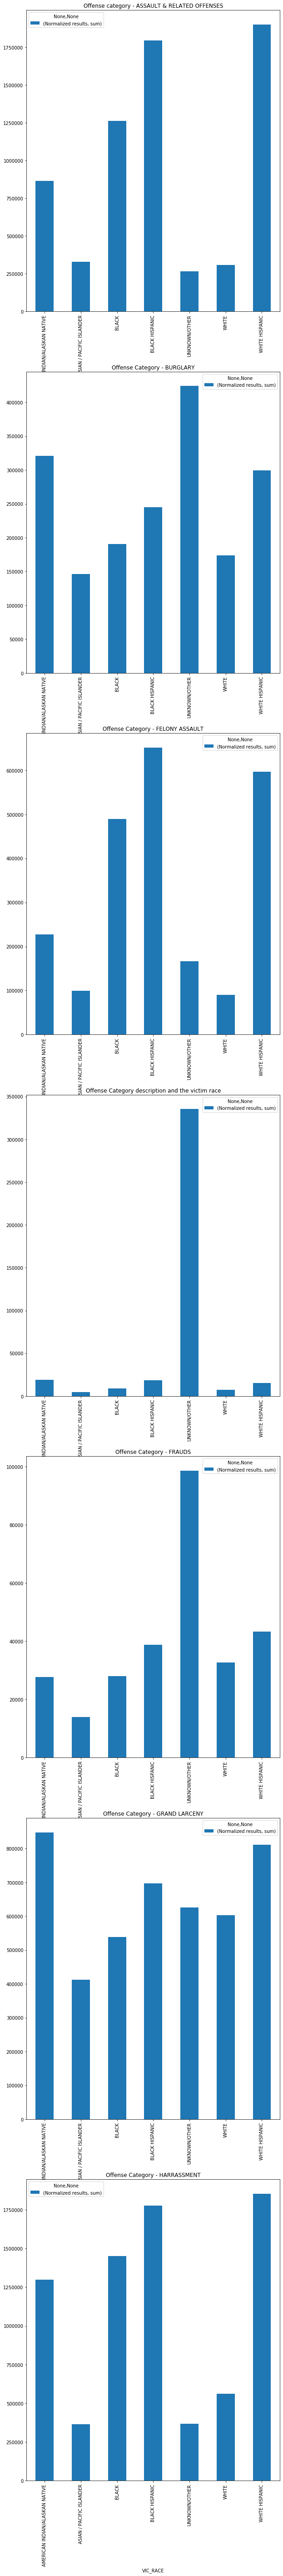

In [28]:
figure2, axis = plt.subplots(7,1,figsize=(10,100)) #https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index
NYC_Complaints_df1.xs('ASSAULT 3 & RELATED OFFENSES').plot(kind='bar',ax=axis[0]).set_title('Offense category - ASSAULT & RELATED OFFENSES') #https://pandas.pydata.org/pandas-docs/version/0.16.0/visualization.html
NYC_Complaints_df1.xs('BURGLARY').plot(kind='bar',ax=axis[1]).set_title('Offense Category - BURGLARY') 
NYC_Complaints_df1.xs('FELONY ASSAULT').plot(kind='bar',ax=axis[2]).set_title('Offense Category - FELONY ASSAULT') 
NYC_Complaints_df1.xs('FORGERY').plot(kind='bar',ax=axis[3]).set_title('Offense Category description and the victim race') 
NYC_Complaints_df1.xs('FRAUDS').plot(kind='bar',ax=axis[4]).set_title('Offense Category - FRAUDS')
NYC_Complaints_df1.xs('GRAND LARCENY').plot(kind='bar',ax=axis[5]).set_title('Offense Category - GRAND LARCENY') 
NYC_Complaints_df1.xs('HARRASSMENT 2').plot(kind='bar',ax=axis[6]).set_title('Offense Category - HARRASSMENT') 

# HYPOTHESIS 3:

The population density of a neighborhood impacts the number of complaints/crimes reported there.(E.g. Is there an inverse trend of the number of crimes with the population density or not).

In [29]:
area_count = NYC_Complaint_Data.groupby(['BORO_NM']).count()
area_count = area_count.reset_index()
area_count

,BORO_NM,CMPLNT_NUM,CMPLNT_FR_DT,Complaint_Filed_Month,Complaint_Filed_Year
0,BRONX,1480541,1480541,1480541,1480541
1,BROOKLYN,2028593,2028593,2028593,2028593
2,MANHATTAN,1640530,1640530,1640530,1640530
3,QUEENS,1347085,1347085,1347085,1347085
4,STATEN ISLAND,320392,320392,320392,320392


In [30]:
NYC_Complaint_Data3 = get_file(Complaints) 
NYC_Complaint_Data3 #106 seconds to run, 33 seconds with relevant columns

,CMPLNT_NUM,CMPLNT_FR_DT,BORO_NM
0,876525802,04/10/2008,BROOKLYN
1,402693528,06/03/2007,MANHATTAN
2,832030069,02/16/2010,QUEENS
3,538308771,11/10/2009,BROOKLYN
4,965693192,04/11/2006,STATEN ISLAND
5,141085517,06/23/2011,BROOKLYN
6,484433797,11/24/2007,BRONX
7,106486628,03/29/2008,BROOKLYN
8,859668043,04/21/2006,MANHATTAN
9,499632944,04/14/2006,STATEN ISLAND


In [31]:
area_population = pd.read_csv(NYC_Population)
area_population = area_population[area_population['Year'] > 2000]
area_population

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
195,Bronx,2010,5,BX01,Claremont-Bathgate,31078
196,Bronx,2010,5,BX03,Eastchester-Edenwald-Baychester,34517
197,Bronx,2010,5,BX05,Bedford Park-Fordham North,54415
198,Bronx,2010,5,BX06,Belmont,27378
199,Bronx,2010,5,BX07,Bronxdale,35538
200,Bronx,2010,5,BX08,West Farms-Bronx River,35011
201,Bronx,2010,5,BX09,Soundview-Castle Hill-Clason Point-Harding Park,53686
202,Bronx,2010,5,BX10,Pelham Bay-Country Club-City Island,26583
203,Bronx,2010,5,BX13,Co-Op City,43752
204,Bronx,2010,5,BX14,East Concourse-Concourse Village,62284


In [32]:
area_population_sum = area_population.groupby(['Borough'])['Population'].sum()
area_population_sum
borough_pop_df = area_population_sum.to_frame().reset_index()
borough_pop_df

,Borough,Population
0,Bronx,1385108
1,Brooklyn,2504700
2,Manhattan,1585873
3,Queens,2230722
4,Staten Island,468730


In [33]:
#https://en.wikipedia.org/wiki/Demographics_of_New_York_City
borough_pop_df['Area in sq. km'] = [109.04, 183.42, 59.13, 281.09, 151.18]
borough_pop_df['Population Density'] = borough_pop_df['Population']/borough_pop_df['Area in sq. km']
borough_pop_df['Borough'] = borough_pop_df['Borough'].str.upper() 
borough_pop_df = borough_pop_df.rename(columns={"Borough": "BORO_NM"})
borough_pop_df

,BORO_NM,Population,Area in sq. km,Population Density
0,BRONX,1385108,109.04,12702.751284
1,BROOKLYN,2504700,183.42,13655.544652
2,MANHATTAN,1585873,59.13,26820.108236
3,QUEENS,2230722,281.09,7935.970686
4,STATEN ISLAND,468730,151.18,3100.476253


In [34]:
result_df = pd.merge(area_count[['BORO_NM','CMPLNT_NUM']], borough_pop_df, how='left', left_on='BORO_NM', right_on='BORO_NM')
result_df

,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density
0,BRONX,1480541,1385108,109.04,12702.751284
1,BROOKLYN,2028593,2504700,183.42,13655.544652
2,MANHATTAN,1640530,1585873,59.13,26820.108236
3,QUEENS,1347085,2230722,281.09,7935.970686
4,STATEN ISLAND,320392,468730,151.18,3100.476253


In [35]:
result_df['crime per capita'] = result_df['CMPLNT_NUM']/result_df['Population']
result_df['Population Density'] = result_df['Population Density'].astype('int64')
result_df = result_df.sort_values(by = 'Population Density',ascending = False)
result_df

,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density,crime per capita
2,MANHATTAN,1640530,1585873,59.13,26820,1.034465
1,BROOKLYN,2028593,2504700,183.42,13655,0.809915
0,BRONX,1480541,1385108,109.04,12702,1.068899
3,QUEENS,1347085,2230722,281.09,7935,0.603878
4,STATEN ISLAND,320392,468730,151.18,3100,0.683532


In [36]:
#calculating the correlation between Population Density and the crime per capita
#https://stackoverflow.com/questions/49350445/correlation-coefficient-of-two-columns-in-pandas-dataframe-with-corr
correlation = result_df['Population Density'].corr(result_df['crime per capita'])
print('The correlation between Population Density and the crime per capita is : ',correlation)

The correlation between Population Density and the crime per capita is :  0.7274235238514618


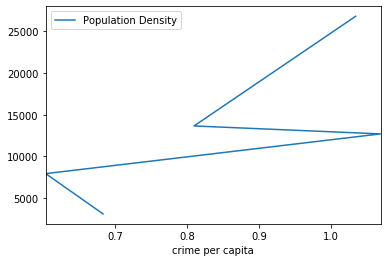

In [37]:
#https://stackoverflow.com/questions/4805048/how-to-get-different-colored-lines-for-different-plots-in-a-single-figure
ax = plt.gca() 
result_df.plot(kind='line',x='crime per capita',y='Population Density',ax=ax)
#result_df.plot(kind='line',x='BORO_NM',y='crime per capita', color='red', ax=ax)
plt.show()

# HYPOTHESIS 4:

There exists a trend between the type of crimes reported in NYC and the neighborhood they occurred in. (e.g. There are a greater number of theft cases in Brooklyn than any other region)

In [46]:
NYC_Complaints_df = get_complaint_file(Complaints) 
NYC_Complaints_df #106 seconds to run, 33 seconds with relevant column


,CMPLNT_NUM,OFNS_DESC,BORO_NM,VIC_RACE
0,876525802,PETIT LARCENY,BROOKLYN,BLACK
1,402693528,DANGEROUS WEAPONS,MANHATTAN,UNKNOWN
2,832030069,ROBBERY,QUEENS,UNKNOWN
3,538308771,PETIT LARCENY,BROOKLYN,UNKNOWN
4,965693192,THEFT-FRAUD,STATEN ISLAND,WHITE
5,141085517,DANGEROUS WEAPONS,BROOKLYN,UNKNOWN
6,484433797,POSSESSION OF STOLEN PROPERTY,BRONX,UNKNOWN
7,106486628,DANGEROUS DRUGS,BROOKLYN,UNKNOWN
8,859668043,ROBBERY,MANHATTAN,WHITE HISPANIC
9,499632944,VEHICLE AND TRAFFIC LAWS,STATEN ISLAND,UNKNOWN


In [47]:
#Selecting only a particular set of crimes that involve harming another human
type_of_crime = ['HARRASSMENT 2','BURGLARY','ROBBERY','FELONY ASSAULT','SEX CRIMES','OFFENSES INVOLVING FRAUD','RAPE','THEFT-FRAUD','MURDER & NON-NEGL. MANSLAUGHTER','KIDNAPPING & RELATED OFFENSES','OFFENSES RELATED TO CHILDREN','KIDNAPPING','OTHER OFFENSES RELATED TO THEF','PETIT LARCENY','GRAND LARCENY','FORGERY','FRAUDS','ASSAULT 3 & RELATED OFFENSES']
#https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/
NYC_Crime_Complaints_df =NYC_Complaints_df[NYC_Complaints_df.OFNS_DESC.isin(type_of_crime)]
NYC_Crime_Complaints_df
#complaints_df_new.OFNS_DESC.unique()
g1 = NYC_Crime_Complaints_df.groupby(["OFNS_DESC", "BORO_NM"], as_index=False).count()
g1 = g1[["OFNS_DESC","BORO_NM","CMPLNT_NUM"]]
g1

,OFNS_DESC,BORO_NM,CMPLNT_NUM
0,ASSAULT 3 & RELATED OFFENSES,BRONX,178043
1,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,224303
2,ASSAULT 3 & RELATED OFFENSES,MANHATTAN,139300
3,ASSAULT 3 & RELATED OFFENSES,QUEENS,144811
4,ASSAULT 3 & RELATED OFFENSES,STATEN ISLAND,31105
5,BURGLARY,BRONX,42179
6,BURGLARY,BROOKLYN,80640
7,BURGLARY,MANHATTAN,44428
8,BURGLARY,QUEENS,59972
9,BURGLARY,STATEN ISLAND,8414


In [49]:
Crime_result_df = pd.merge(g1, borough_pop_df, how='left', left_on='BORO_NM', right_on='BORO_NM')
Crime_result_df
# #Creating a function to add crime per capita values
# def label_per_capita(row):  #https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
#    if row['BORO_NM'] == 'BRONX' :
#       return 0.628725
#    if row['BORO_NM'] == 'BROOKLYN':
#       return 0.519004
#    if row['BORO_NM'] == 'MANHATTAN' :
#       return 0.716043
#    if row['BORO_NM'] == 'QUEENS':
#       return 0.394619
#    if row['BORO_NM']  == 'STATEN ISLAND':
#       return 0.412634

,OFNS_DESC,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density
0,ASSAULT 3 & RELATED OFFENSES,BRONX,178043,1385108,109.04,12702.751284
1,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,224303,2504700,183.42,13655.544652
2,ASSAULT 3 & RELATED OFFENSES,MANHATTAN,139300,1585873,59.13,26820.108236
3,ASSAULT 3 & RELATED OFFENSES,QUEENS,144811,2230722,281.09,7935.970686
4,ASSAULT 3 & RELATED OFFENSES,STATEN ISLAND,31105,468730,151.18,3100.476253
5,BURGLARY,BRONX,42179,1385108,109.04,12702.751284
6,BURGLARY,BROOKLYN,80640,2504700,183.42,13655.544652
7,BURGLARY,MANHATTAN,44428,1585873,59.13,26820.108236
8,BURGLARY,QUEENS,59972,2230722,281.09,7935.970686
9,BURGLARY,STATEN ISLAND,8414,468730,151.18,3100.476253


In [51]:
Crime_result_df['complaints per capita'] = Crime_result_df['CMPLNT_NUM']/Crime_result_df['Population']
Crime_result_df['complaints per capita'] = Crime_result_df['complaints per capita'].astype('float64')
Crime_result_df


,OFNS_DESC,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density,complaints per capita
0,ASSAULT 3 & RELATED OFFENSES,BRONX,178043,1385108,109.04,12702.751284,0.128541
1,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,224303,2504700,183.42,13655.544652,0.089553
2,ASSAULT 3 & RELATED OFFENSES,MANHATTAN,139300,1585873,59.13,26820.108236,0.087838
3,ASSAULT 3 & RELATED OFFENSES,QUEENS,144811,2230722,281.09,7935.970686,0.064917
4,ASSAULT 3 & RELATED OFFENSES,STATEN ISLAND,31105,468730,151.18,3100.476253,0.066360
5,BURGLARY,BRONX,42179,1385108,109.04,12702.751284,0.030452
6,BURGLARY,BROOKLYN,80640,2504700,183.42,13655.544652,0.032195
7,BURGLARY,MANHATTAN,44428,1585873,59.13,26820.108236,0.028015
8,BURGLARY,QUEENS,59972,2230722,281.09,7935.970686,0.026885
9,BURGLARY,STATEN ISLAND,8414,468730,151.18,3100.476253,0.017951


In [52]:
g2 = Crime_result_df.groupby(['BORO_NM','OFNS_DESC']).agg({'complaints per capita': ['sum']})
g2
#g1.sort_values(['complaints per capita'], ascending=False)

complaints per capita
                                                               sum
BORO_NM       OFNS_DESC                                           
BRONX         ASSAULT 3 & RELATED OFFENSES                0.128541
              BURGLARY                                    0.030452
              FELONY ASSAULT                              0.050381
              FORGERY                                     0.008570
              FRAUDS                                      0.005214
              GRAND LARCENY                               0.056999
              HARRASSMENT 2                               0.135887
              KIDNAPPING                                  0.000009
              KIDNAPPING & RELATED OFFENSES               0.000493
              OFFENSES INVOLVING FRAUD                    0.003251
              OFFENSES RELATED TO CHILDREN                0.000290
              OTHER OFFENSES RELATED TO THEF              0.002079
              PETIT LARCENY                               0.141537
              RAPE                                        0.003161
              ROBBERY                                     0.042351
              SEX CRIMES                                  0.010840
              THEFT-FRAUD                                 0.008672
BROOKLYN      ASSAULT 3 & RELATED OFFENSES                0.089553
              BURGLARY                                    0.032195
              FELONY ASSAULT                              0.034197
              FORGERY                                     0.008316
              FRAUDS                                      0.004693
              GRAND LARCENY                               0.062660
              HARRASSMENT 2                               0.102861
              KIDNAPPING                                  0.000007
              KIDNAPPING & RELATED OFFENSES               0.000392
              OFFENSES INVOLVING FRAUD                    0.001179
              OFFENSES RELATED TO CHILDREN                0.000153
              OTHER OFFENSES RELATED TO THEF              0.001760
              PETIT LARCENY                               0.126132
...                                                            ...
QUEENS        FRAUDS                                      0.003401
              GRAND LARCENY                               0.050039
              HARRASSMENT 2                               0.080640
              KIDNAPPING                                  0.000003
              KIDNAPPING & RELATED OFFENSES               0.000233
              OFFENSES INVOLVING FRAUD                    0.000771
              OFFENSES RELATED TO CHILDREN                0.000322
              OTHER OFFENSES RELATED TO THEF              0.001395
              PETIT LARCENY                               0.098207
              RAPE                                        0.002017
              ROBBERY                                     0.022667
              SEX CRIMES                                  0.007742
              THEFT-FRAUD                                 0.006597
STATEN ISLAND ASSAULT 3 & RELATED OFFENSES                0.066360
              BURGLARY                                    0.017951
              FELONY ASSAULT                              0.016777
              FORGERY                                     0.003460
              FRAUDS                                      0.007550
              GRAND LARCENY                               0.033426
              HARRASSMENT 2                               0.130770
              KIDNAPPING                                  0.000004
              KIDNAPPING & RELATED OFFENSES               0.000188
              OFFENSES INVOLVING FRAUD                    0.000917
              OFFENSES RELATED TO CHILDREN                0.000060
              OTHER OFFENSES RELATED TO THEF              0.001323
              PETIT LARCENY                               0.104713
              RAPE       

In [53]:
g3 = Crime_result_df.groupby(['OFNS_DESC','BORO_NM']).agg({'complaints per capita': ['sum']})
g3
#g1.sort_values(['complaints per capita'], ascending=False)

complaints per capita
                                                               sum
OFNS_DESC                      BORO_NM                            
ASSAULT 3 & RELATED OFFENSES   BRONX                      0.128541
                               BROOKLYN                   0.089553
                               MANHATTAN                  0.087838
                               QUEENS                     0.064917
                               STATEN ISLAND              0.066360
BURGLARY                       BRONX                      0.030452
                               BROOKLYN                   0.032195
                               MANHATTAN                  0.028015
                               QUEENS                     0.026885
                               STATEN ISLAND              0.017951
FELONY ASSAULT                 BRONX                      0.050381
                               BROOKLYN                   0.034197
                               MANHATTAN                  0.029791
                               QUEENS                     0.022291
                               STATEN ISLAND              0.016777
FORGERY                        BRONX                      0.008570
                               BROOKLYN                   0.008316
                               MANHATTAN                  0.013091
                               QUEENS                     0.006492
                               STATEN ISLAND              0.003460
FRAUDS                         BRONX                      0.005214
                               BROOKLYN                   0.004693
                               MANHATTAN                  0.007830
                               QUEENS                     0.003401
                               STATEN ISLAND              0.007550
GRAND LARCENY                  BRONX                      0.056999
                               BROOKLYN                   0.062660
                               MANHATTAN                  0.143925
                               QUEENS                     0.050039
                               STATEN ISLAND              0.033426
...                                                            ...
OTHER OFFENSES RELATED TO THEF BRONX                      0.002079
                               BROOKLYN                   0.001760
                               MANHATTAN                  0.002702
                               QUEENS                     0.001395
                               STATEN ISLAND              0.001323
PETIT LARCENY                  BRONX                      0.141537
                               BROOKLYN                   0.126132
                               MANHATTAN                  0.225677
                               QUEENS                     0.098207
                               STATEN ISLAND              0.104713
RAPE                           BRONX                      0.003161
                               BROOKLYN                   0.002394
                               MANHATTAN                  0.002647
                               QUEENS                     0.002017
                               STATEN ISLAND              0.001621
ROBBERY                        BRONX                      0.042351
                               BROOKLYN                   0.034197
                               MANHATTAN                  0.030791
                               QUEENS                     0.022667
                               STATEN ISLAND              0.012094
SEX CRIMES                     BRONX                      0.010840
                               BROOKLYN                   0.010192
                               MANHATTAN                  0.012840
                               QUEENS                     0.007742
                               STATEN ISLAND              0.005986
THEFT-FRAUD                    BRONX                      0.008672
                         

Text(0.5, 1.0, 'HARRASSMENT - Crime count')

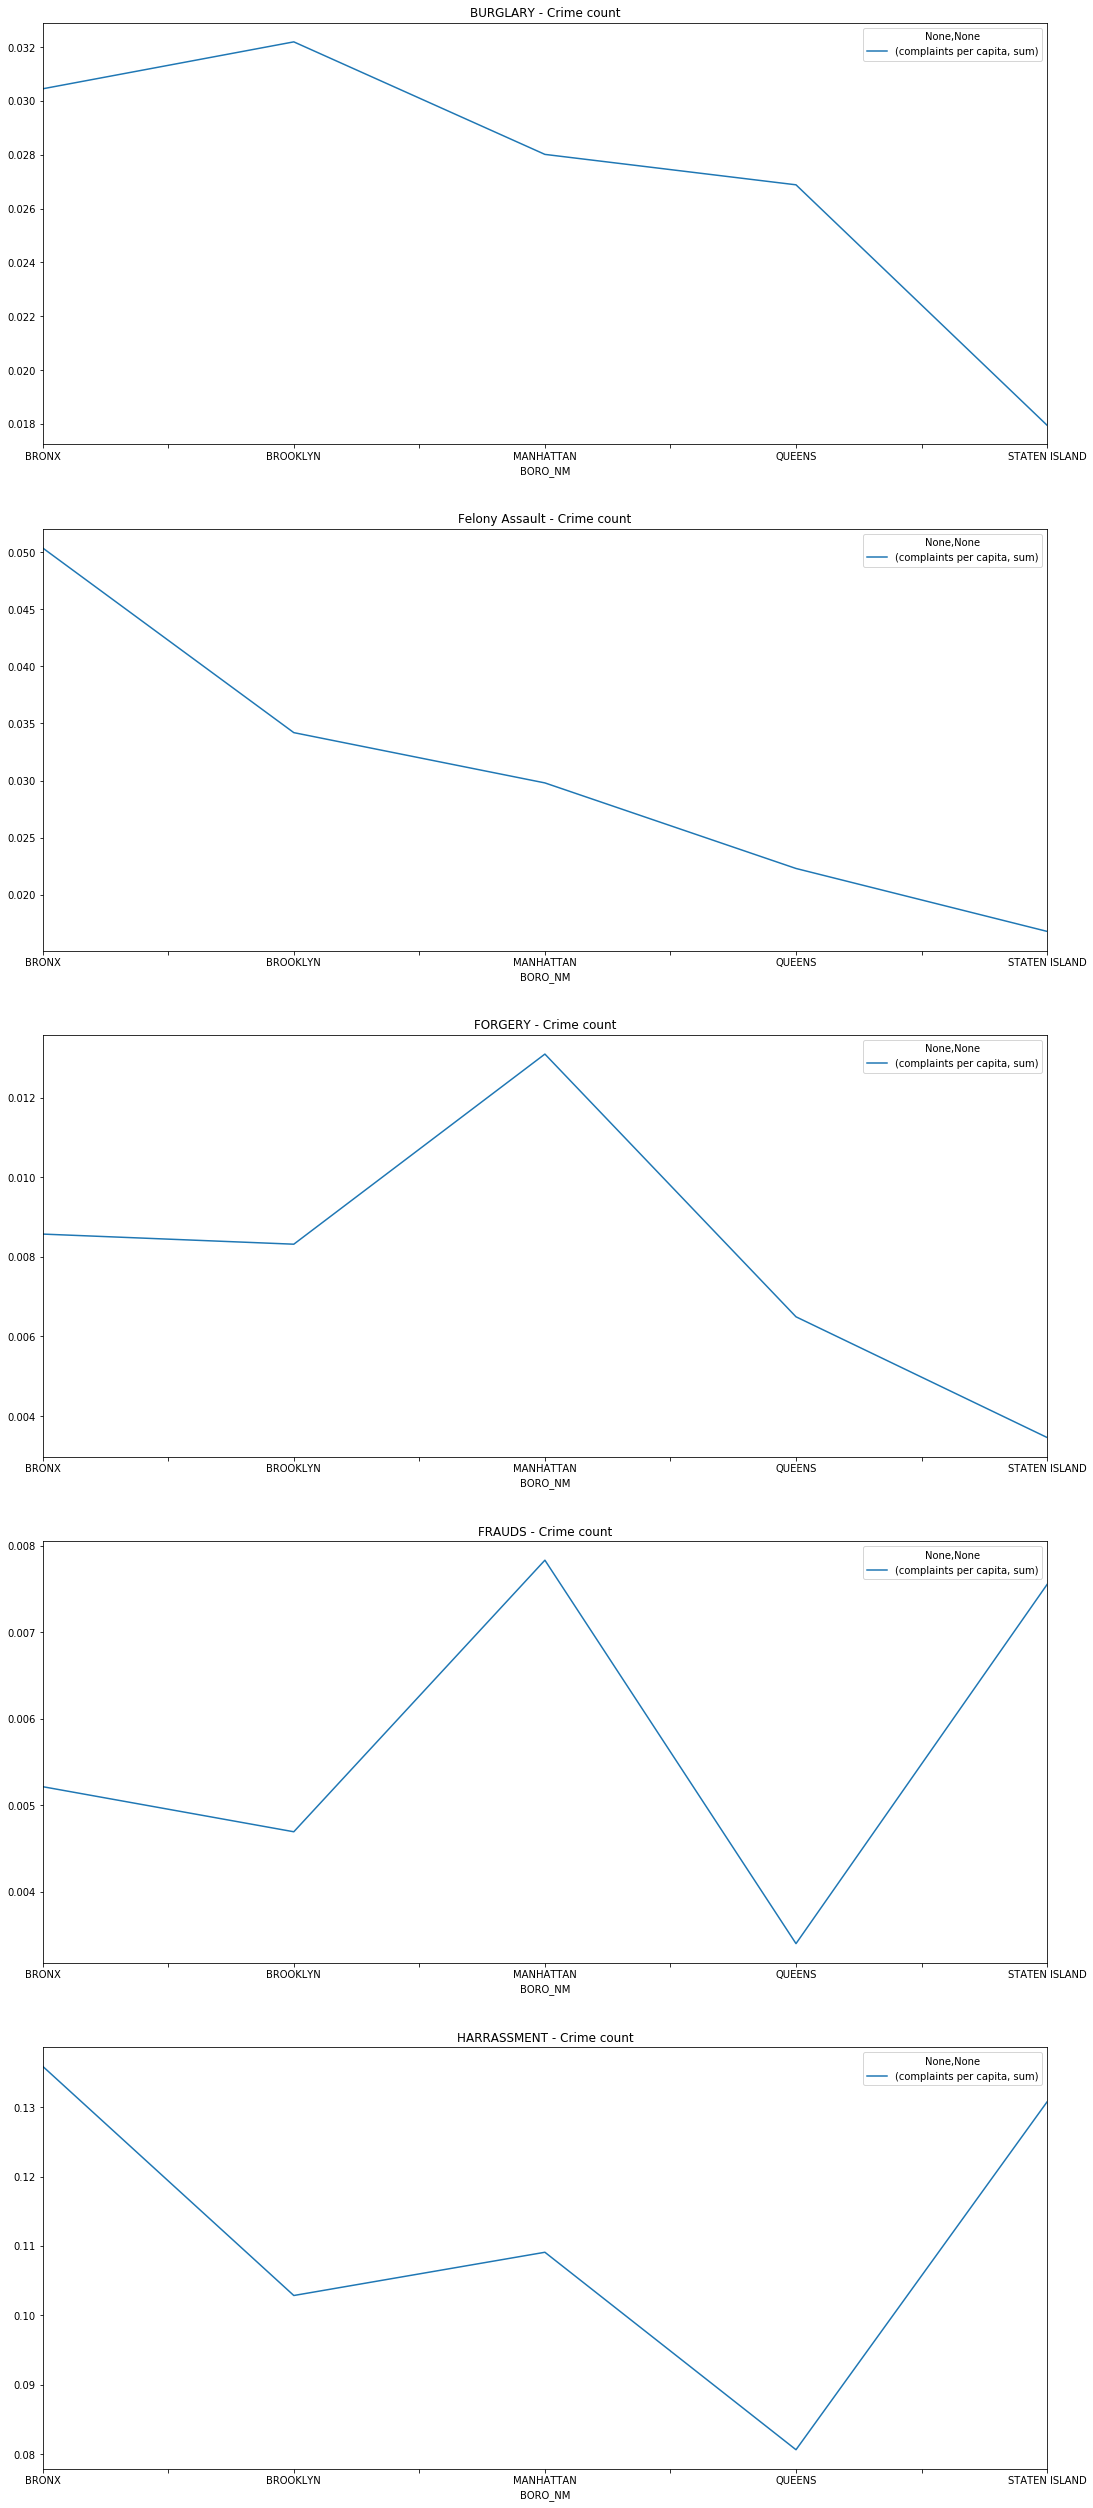

In [54]:
figure, axis = plt.subplots(5,1,figsize=(18,45)) #https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index
g3.xs('BURGLARY').plot(kind='line',ax=axis[0]).set_title('BURGLARY - Crime count') #https://pandas.pydata.org/pandas-docs/version/0.16.0/visualization.html
g3.xs('FELONY ASSAULT').plot(kind='line',ax=axis[1]).set_title('Felony Assault - Crime count') 
g3.xs('FORGERY').plot(kind='line',ax=axis[2]).set_title('FORGERY - Crime count') 
g3.xs('FRAUDS').plot(kind='line',ax=axis[3]).set_title('FRAUDS - Crime count') 
g3.xs('HARRASSMENT 2').plot(kind='line',ax=axis[4]).set_title('HARRASSMENT - Crime count') 

# Hypothesis 5:
The population density is directly proportional the average response time taken by an emergency unit to respond to that incident. (E.g. Are the instances of the vehicle taking more time to reach the emergency spot greater in densely populated neighborhoods?)

In [56]:
def get_file(EMS_Data_File):
    
    """Given a filename which has a comma separated (.csv) filetype,return a pandas  
    dataframe of crime data containing the three relevant columns needed for analysis.
    
    We load the file as a pandas dataframe having no headers and load only 3 relevant column 
    needed for analysis called (CMPLNT_NUM,CMPLNT_FR_DT and BORO_NM)
    
    :param csv_files: The csv file to load
    :return: a pandas dataframe of crime data containing the three relevant columns needed for analysis
    """
    data_file = pd.read_csv(EMS_Data_File,usecols=['CAD_INCIDENT_ID','INCIDENT_DATETIME','DISPATCH_RESPONSE_SECONDS_QY','INCIDENT_RESPONSE_SECONDS_QY','INCIDENT_TRAVEL_TM_SECONDS_QY','BOROUGH']) # Import only necessary columns from the dataset
    return data_file

In [68]:
EMS_Data = get_file(EMS_incident)
EMS_Data

,CAD_INCIDENT_ID,INCIDENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,BOROUGH
0,80010001,01/01/2008 12:00:01 AM,0,NaN,NaN,BROOKLYN
1,80010002,01/01/2008 12:00:05 AM,0,NaN,NaN,BROOKLYN
2,80010003,01/01/2008 12:00:06 AM,732,1657.0,925.0,QUEENS
3,80010004,01/01/2008 12:00:07 AM,0,NaN,NaN,BROOKLYN
4,80010005,01/01/2008 12:00:09 AM,0,NaN,NaN,BROOKLYN
5,80010006,01/01/2008 12:01:09 AM,0,0.0,0.0,BRONX
6,80010007,01/01/2008 12:01:15 AM,90,90.0,0.0,MANHATTAN
7,80010008,01/01/2008 12:02:09 AM,19,463.0,444.0,QUEENS
8,80010009,01/01/2008 12:02:30 AM,31,632.0,601.0,MANHATTAN
9,80010010,01/01/2008 12:02:43 AM,52,416.0,364.0,BRONX


In [76]:
#Extracting the Month and Year of the incident
EMS_Data['Incident_Month'] = EMS_Data.INCIDENT_DATETIME.str[:2]
EMS_Data['Incident_Year'] = EMS_Data.INCIDENT_DATETIME.str[6:10]
EMS_Data['INCIDENT_DATETIME'] = EMS_Data['INCIDENT_DATETIME'].dropna()
EMS_Data

,CAD_INCIDENT_ID,INCIDENT_DATETIME,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,BOROUGH,Incident_Month,Incident_Year
0,80010001,01/01/2008 12:00:01 AM,0,NaN,NaN,BROOKLYN,01,2008
1,80010002,01/01/2008 12:00:05 AM,0,NaN,NaN,BROOKLYN,01,2008
2,80010003,01/01/2008 12:00:06 AM,732,1657.0,925.0,QUEENS,01,2008
3,80010004,01/01/2008 12:00:07 AM,0,NaN,NaN,BROOKLYN,01,2008
4,80010005,01/01/2008 12:00:09 AM,0,NaN,NaN,BROOKLYN,01,2008
5,80010006,01/01/2008 12:01:09 AM,0,0.0,0.0,BRONX,01,2008
6,80010007,01/01/2008 12:01:15 AM,90,90.0,0.0,MANHATTAN,01,2008
7,80010008,01/01/2008 12:02:09 AM,19,463.0,444.0,QUEENS,01,2008
8,80010009,01/01/2008 12:02:30 AM,31,632.0,601.0,MANHATTAN,01,2008
9,80010010,01/01/2008 12:02:43 AM,52,416.0,364.0,BRONX,01,2008


In [80]:
#EMS_incident_response_avg = EMS_Data[['INCIDENT_RESPONSE_SECONDS_QY','BOROUGH']]
#EMS_incident_response_avg = EMS_Data.dropna()
EMS_incident_response_avg = EMS_Data.groupby(['BOROUGH','Incident_Year','Incident_Month'],as_index=False)['INCIDENT_RESPONSE_SECONDS_QY'].mean()
#EMS_incident_response_avg['INCIDENT_RESPONSE_SECONDS_QY']=EMS_incident_response_avg['INCIDENT_RESPONSE_SECONDS_QY'].astype('int64')
EMS_incident_response_avg['AVG_INCIDENT_RESPONSE (Minutes)'] = EMS_incident_response_avg['INCIDENT_RESPONSE_SECONDS_QY']/60
EMS_incident_response_avg

,BOROUGH,Incident_Year,Incident_Month,INCIDENT_RESPONSE_SECONDS_QY,AVG_INCIDENT_RESPONSE (Minutes)
0,BRONX,2008,01,469.264159,7.821069
1,BRONX,2008,02,548.894558,9.148243
2,BRONX,2008,03,493.512034,8.225201
3,BRONX,2008,04,463.216668,7.720278
4,BRONX,2008,05,504.456272,8.407605
5,BRONX,2008,06,523.507759,8.725129
6,BRONX,2008,07,468.970765,7.816179
7,BRONX,2008,08,457.533278,7.625555
8,BRONX,2008,09,483.628107,8.060468
9,BRONX,2008,10,468.165752,7.802763


In [81]:
#Renaming the index to Staten Island 
EMS_incident_response_avg = EMS_incident_response_avg.replace({'BOROUGH': 'RICHMOND / STATEN ISLAND'}, 'STATEN ISLAND')

In [82]:
result_inc_resp_df = pd.merge(result_df, EMS_incident_response_avg, how='inner', left_on='BORO_NM', right_on='BOROUGH')
result_inc_resp_df

,BORO_NM,CMPLNT_NUM,Population,Area in sq. km,Population Density,crime per capita,BOROUGH,Incident_Year,Incident_Month,INCIDENT_RESPONSE_SECONDS_QY,AVG_INCIDENT_RESPONSE (Minutes)
0,MANHATTAN,1640530,1585873,59.13,26820,1.034465,MANHATTAN,2008,01,532.468995,8.874483
1,MANHATTAN,1640530,1585873,59.13,26820,1.034465,MANHATTAN,2008,02,604.704329,10.078405
2,MANHATTAN,1640530,1585873,59.13,26820,1.034465,MANHATTAN,2008,03,564.243934,9.404066
3,MANHATTAN,1640530,1585873,59.13,26820,1.034465,MANHATTAN,2008,04,543.036181,9.050603
4,MANHATTAN,1640530,1585873,59.13,26820,1.034465,MANHATTAN,2008,05,597.621071,9.960351
5,MANHATTAN,1640530,1585873,59.13,26820,1.034465,MANHATTAN,2008,06,633.817182,10.563620
6,MANHATTAN,1640530,1585873,59.13,26820,1.034465,MANHATTAN,2008,07,556.273364,9.271223
7,MANHATTAN,1640530,1585873,59.13,26820,1.034465,MANHATTAN,2008,08,540.245985,9.004100
8,MANHATTAN,1640530,1585873,59.13,26820,1.034465,MANHATTAN,2008,09,580.171732,9.669529
9,MANHATTAN,1640530,1585873,59.13,26820,1.034465,MANHATTAN,2008,10,564.075660,9.401261


In [83]:
#calculating the correlation between Population Density and the incident response time
#https://stackoverflow.com/questions/49350445/correlation-coefficient-of-two-columns-in-pandas-dataframe-with-corr
correlation = result_df['Population Density'].corr(result_inc_resp_df['AVG_INCIDENT_RESPONSE (Minutes)'])
print('The correlation coefficient between Population Density and the Incident response time is : ',correlation)

The correlation coefficient between Population Density and the Incident response time is :  -0.16122252898113099


In [93]:
g4 = result_inc_resp_df.groupby(['BORO_NM','Incident_Year','Incident_Month']).agg({'AVG_INCIDENT_RESPONSE (Minutes)': ['sum']})
g4

AVG_INCIDENT_RESPONSE (Minutes)
                                                                       sum
BORO_NM       Incident_Year Incident_Month                                
BRONX         2008          01                                    7.821069
                            02                                    9.148243
                            03                                    8.225201
                            04                                    7.720278
                            05                                    8.407605
                            06                                    8.725129
                            07                                    7.816179
                            08                                    7.625555
                            09                                    8.060468
                            10                                    7.802763
                            11                                    7.647434
                            12                                    8.492934
              2009          01                                    7.947173
                            02                                    7.581625
                            03                                    7.907127
                            04                                    8.033873
                            05                                   10.507347
                            06                                    9.665751
                            07                                    8.638272
                            08                                    8.434349
                            09                                    8.184050
                            10                                    8.075493
                            11                                    7.856766
                            12                                    8.319111
              2010          01                                    8.424227
                            02                                    8.289266
                            03                                    8.199156
                            04                                    8.210946
                            05                                    9.390368
                            06                                    9.385025
...                                                                    ...
STATEN ISLAND 2017          07                                    6.947364
                            08                                    6.763392
                            09                                    7.023467
                            10                                    6.958616
                            11                                    7.447408
                            12                                    7.607067
              2018          01                                    7.782383
                            02                                    7.168499
                            03                                    6.956904
                            04                                    7.446912
                            05                                    7.945626
                            06                                    7.430137
                            07                                    7.253643
                            08                                    7.487971
                            09                                    7.756479
                            10                                    7.907549
                            11                                    8.264687
                            12                                    8.376529
              2019          01                                    7.799404
                            02                                    7.

Text(0.5, 1.0, 'STATEN ISLAND - Average Incident Response Time')

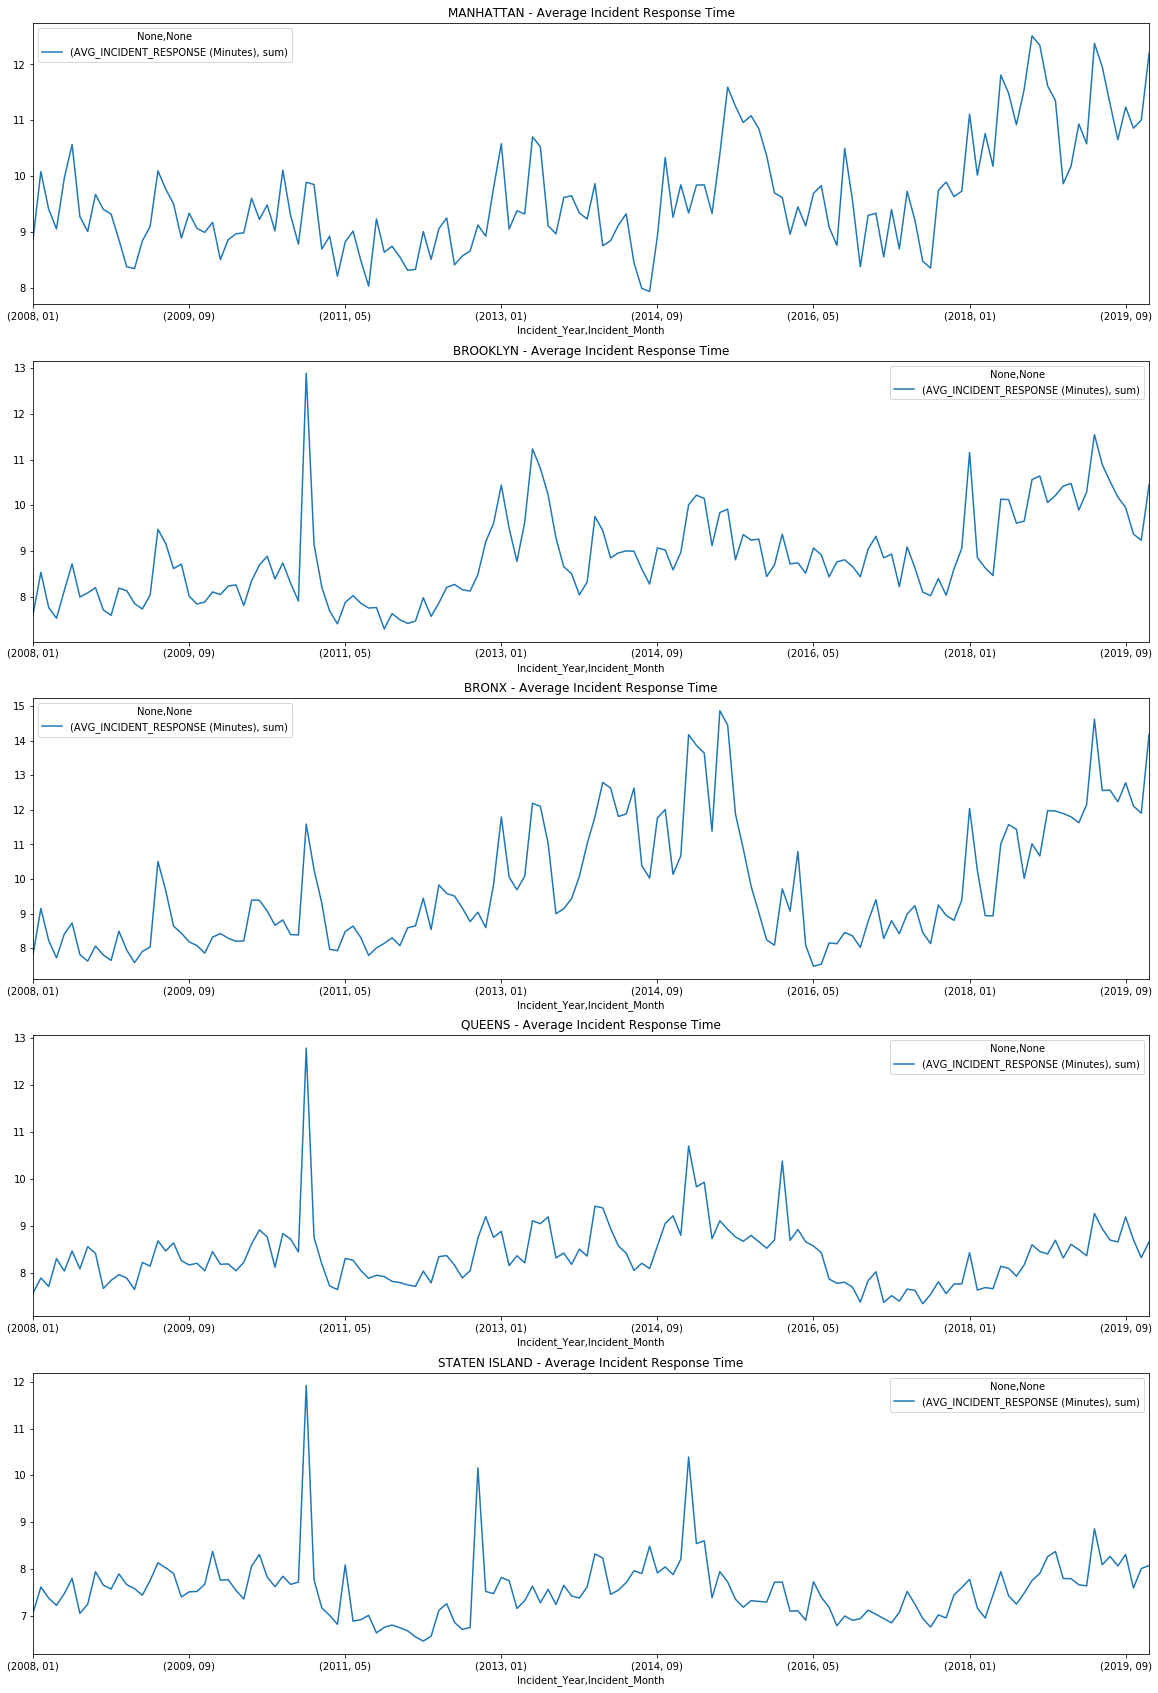

In [99]:
figure, axis = plt.subplots(5,1,figsize=(20,30)) #https://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index

g4.xs('MANHATTAN').plot(kind='line',ax=axis[0]).set_title('MANHATTAN - Average Incident Response Time')  #https://pandas.pydata.org/pandas-docs/version/0.16.0/visualization.html
g4.xs('BROOKLYN').plot(kind='line',ax=axis[1]).set_title('BROOKLYN - Average Incident Response Time') 
g4.xs('BRONX').plot(kind='line',ax=axis[2]).set_title('BRONX - Average Incident Response Time')
g4.xs('QUEENS').plot(kind='line',ax=axis[3]).set_title('QUEENS - Average Incident Response Time') 
g4.xs('STATEN ISLAND').plot(kind='line',ax=axis[4]).set_title('STATEN ISLAND - Average Incident Response Time') 